# Concept
This year 2018 iGEM NTHU_Taiwan aims to solve the Vibrio infection in aquaculture with bio-competiotion model. We are inspired by the peroidic patter of Lotka-Volterra model, and try to control the Vibrio population with engineered E.coli. 


## Math part
###  Equation

We modify from Lotka-Volterra model, with logistic population groth model, and the the decay rate of compound.

$$\begin{equation}\begin{aligned}
{{dV}\over{dt}} &= (r_v - D)V - {{r_v} \over {V_{max}}} V^2 -a VM\\
{{dA} \over {dt}} &= k_AV - \lambda_A A\\
{{dE} \over {dt}} &= (r_E - D)E - {{r_E} \over {E_{max}}} E^2 -a EA\\
{{dN} \over {dt}} &= k_NE - \lambda_N N 
\end{aligned}\end{equation}$$


<br>
Because of the mechanism of quoro-sensing, we make a threshold of Vibrio secreting AHL

$$V < V_t , \ k_A= 0$$


#### parameters

#### unit (M)
- V: Vibrio
- A: AHL
- E: E.coli
- N: Nisin
- ${V_t}$: threshold of Vibrio concentration to secrete AHL

#### unit (hr-1)
- ${r_v}$: groth rate of Vibrio   
- ${V_{max}}$: max capacity of vibrio
- ${k_A}$: secrete rate of AHL from Vibrio
- ${\lambda_A}$: decay rate of AHL

- ${r_E}$: groth rate of E.coli
- ${E_{max}}$: max capacity og E.coli
- ${k_N}$: secrete rate of Nisin from E.coli
- ${\lambda_N}$: decay rate of Nisin

- ${D}$ : dilution rate of pump




## Code part
Use python for short life.
Matlab is another good choice, however it is unnecessary to install so much library and unusabel tool. 

In [1]:
import numpy as np
from scipy.integrate import odeint

import matplotlib.pyplot as plt
import math
from equation import lotVolRevised

### Setting parameter 
In the experimental stage, we set the parameter with symmetry.

In order to make this model more valuable, we will firstly check them from paper. If the time avaliable, our wet lab will modify the genetic expression and give all measurments of the parameters.

In [2]:
# initial condition
vibrio_0 = 0.5
ahl_0 = 0
ecoli_0 = 0.1
nisin_0 = 0

# parameters 
## Vibrio and AHL associated
Vibrio_GrothRate = 0.02
Vibrio_MaxCapacity = 1
Nisin_Vibrio_Binding_Strength = 0.05

Ahl_Secrete_Ratio = 0.02
Ahl_DecayRate = 0.01
Ahl_Secrete_Threshod = 0

## Ecoli and Nisin associated
Ecoli_GrothRate = 0.02
Ecoli_MaxCapacity = 1
Ahl_Ecoli_Binding_Strength = 0.05

Nsin_Sectete_Ratio = 0.03
Nisin_DecayRate = 0.01

## Mechenical associated
Dilution_Rate = 0


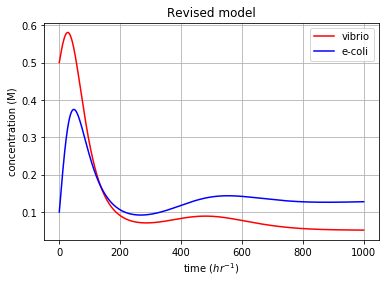

In [3]:
# time interval
t = np.arange(0,1000,0.1)

# load data
y0 = [vibrio_0, ahl_0, ecoli_0, nisin_0]
params = (
    Vibrio_GrothRate,
    Vibrio_MaxCapacity,
    Nisin_Vibrio_Binding_Strength,
    Ahl_Secrete_Ratio,
    Ahl_DecayRate,
    Ahl_Secrete_Threshod,
    Ecoli_GrothRate,
    Ecoli_MaxCapacity,
    Ahl_Ecoli_Binding_Strength,
    Nsin_Sectete_Ratio,
    Nisin_DecayRate,
    Dilution_Rate
)


sol = odeint(lotVolRevised,y0,t,args=params)


# create a figure and add a subplot(111)
fig, ax = plt.subplots()

ax.set_title('Revised model')
ax.plot(t, sol[:,0], 'r', label='vibrio')
ax.plot(t, sol[:,2], 'b', label='e-coli')
ax.set(xlabel='time ($hr^{-1}$)')
ax.set(ylabel='concentration (M)')
# open the legend box
ax.legend(loc='best')
ax.grid()

plt.show()

